# Proyek Analisis Data: Dataset Kualitas Udara
- **Nama:** Frederico Godwyn
- **Email:** frederico.godwyn@gmail.com
- **ID Dicoding:** frederico_pratama_GUq0

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara suhu udara dengan konsentrasi ozon?
- Bagaimana temperatur mempengaruhi polutan
- Bagaimana musim mempengaruhi polutan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

Pertama kita ambil dulu data csv dari link berikut lalu menampilkan beberapa data dari link tersebut

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- didapatkan data mengenai air quality yang sepertinya ada beberapa variable yang dapat mempengaruhi atau dipengaruhi oleh air qualitu
- dari sini kita dapat mendapatkan beberapa parameter untuk data analysis

### Assessing Data

Kita perlu menghitung ada berapa data yang kosong di dalam data tersebut

In [4]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Mencari berapa data duplikat

In [5]:
df.duplicated().sum()

0

Memastikan bahwa datatype semuanya sudah benar apa belum

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- adanya data yang kosong
- tidak ada data yang duplikat
- waktu dalam format yang salah

### Cleaning Data

Melakukan cleaning data dengan menggunakan metode drop

In [7]:
df.dropna(inplace=True)

Memastikan bahwa data kosong sudah hilang

In [8]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Menambahkan kolom baru yang berisi waktu dengan format yang benar

In [9]:
df['datetime']=pd.to_datetime(df[['year','month','day','hour']])

Memastikan bahwa datatype semua sudah benar

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        31815 non-null  int64         
 1   year      31815 non-null  int64         
 2   month     31815 non-null  int64         
 3   day       31815 non-null  int64         
 4   hour      31815 non-null  int64         
 5   PM2.5     31815 non-null  float64       
 6   PM10      31815 non-null  float64       
 7   SO2       31815 non-null  float64       
 8   NO2       31815 non-null  float64       
 9   CO        31815 non-null  float64       
 10  O3        31815 non-null  float64       
 11  TEMP      31815 non-null  float64       
 12  PRES      31815 non-null  float64       
 13  DEWP      31815 non-null  float64       
 14  RAIN      31815 non-null  float64       
 15  wd        31815 non-null  object        
 16  WSPM      31815 non-null  float64       
 17  station   31815 n

**Insight:**
- adanya data yang banyak dan yang tidak terisi juga banyak yang membuat untuk menggunakan dropna itu bisa dilakukan
- dilakukannya penambahan kolom untuk data format yang benar

## Exploratory Data Analysis (EDA)

### Explore ...

Mencari korelasi antara 2 variabel jika - artinya berlawanan dan + artinya berbanding lurus

In [11]:
df['O3'].corr(df['TEMP'])

0.5887340038067712

In [12]:
df['TEMP'].corr(df['PM2.5'])

-0.12571078876150255

In [13]:
df['TEMP'].corr(df['PM10'])

-0.11037144316551259

Mengambil data mean min max antara pm2.5 dan pm10 disetiap bulan dalam tahun

In [14]:
df.groupby(["year","month"])[["PM2.5","PM10"]].agg({
    "PM2.5":["mean","min","max"],
    "PM10":["mean","min","max"]
})

PM2.5                    PM10             
                  mean  min    max        mean   min    max
year month                                                 
2013 3      114.719755  3.0  463.0  148.294028   3.0  662.0
     4       58.616099  3.0  263.0  104.509288   6.0  358.0
     5       88.467532  5.0  665.0  140.288961  11.0  655.0
     6      110.139165  3.0  510.0  135.011928   6.0  564.0
     7       68.634670  4.0  271.0   85.161891   3.0  396.0
     8       61.176678  3.0  260.0   83.749117   3.0  268.0
     9       78.345221  3.0  321.0  104.259629   2.0  344.0
     10      95.896755  3.0  367.0  119.719764   2.0  409.0
     11      50.157303  3.0  322.0   77.231461   6.0  334.0
     12      87.172764  3.0  420.0  121.686992   6.0  655.0
2014 1       98.555241  3.0  538.0  128.946176   6.0  640.0
     2      137.216529  3.0  584.0  144.786777   5.0  654.0
     3       98.332879  3.0  410.0  146.724420   5.0  518.0
     4      100.353941  3.0  294.0  169.527048   5.0  603.0
     5       71.756233  7.0  290.0  135.011496   7.0  948.0
     6       59.301408  3.0  463.0   60.638028   3.0  463.0
     7       93.363265  5.0  280.0   93.363265   5.0  280.0
     8       68.849374  3.0  214.0   83.691099   3.0  316.0
     9       70.816317  3.0  226.0  103.254940   7.0  328.0
     10     128.753067  3.0  446.0  164.411043   3.0  518.0
     11      93.630056  3.0  464.0  131.701966   5.0  634.0
     12      55.799479  3.0  325.0   98.343750   6.0  538.0
2015 1       91.813488  3.0  497.0  115.269210   5.0  578.0
     2       85.893189  3.0  351.0  123.753870   5.0  862.0
     3       88.432996  3.0  332.0  157.168741   6.0  874.0
     4       74.962366  6.0  246.0  127.703687   6.0  442.0
     5       58.830320  3.0  261.0  109.340751   6.0  508.0
     6       62.832827  3.0  309.0   87.547112   5.0  468.0
     7       65.809322  3.0  196.0   83.418079   5.0  368.0
     8       45.052786  3.0  184.0   70.844575   3.0  361.0
     9       51.720414  3.0  252.0   71.795858   5.0  296.0
     10      78.001387  3.0  401.0   97.772538   5.0  401.0
     11     116.926471  3.0  584.0  123.819118   3.0  630.0
     12     135.820059  3.0  635.0  147.495575   5.0  647.0
2016 1       65.778098  3.0  547.0   84.825648   5.0  582.0
     2       43.792593  3.0  713.0   60.854815   5.0  884.0
     3      101.882609  3.0  438.0  157.888406   5.0  873.0
     4       67.100450  3.0  253.0  108.178411   5.0  472.0
     5       53.317852  3.0  314.0   75.928882   5.0  834.0
     6       57.710983  3.0  208.0   72.252890   5.0  473.0
     7       72.230216  3.0  248.0   78.073381   5.0  450.0
     8       45.741110  3.0  156.0   48.783784   4.0  156.0
     9       56.119617  3.0  240.0   68.867624   6.0  248.0
     10      85.390000  3.0  346.0   99.407143   6.0  346.0
     11      99.960469  3.0  363.0  126.440703   7.0  449.0
     12     132.838843  3.0  530.0  145.921488   6.0  567.0
2017 1      117.984081  3.0  713.0  130.558611   5.0  858.0
     2       71.163580  3.0  359.0   84.027778   3.0  359.0

**Insight:**
- Bisa didapatkan bahwa temperatur mempengaruhi ozon secara moderat
- Bisa didapatkan bahwa temperature yang menurun tidak begitu mempengaruhi peningkatan polutan
- Bisa didapatkan data mean,max,min untuk tiap bulan dalam tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Membuat plot antara hubungan konsentrasi ozon dengan temp

c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


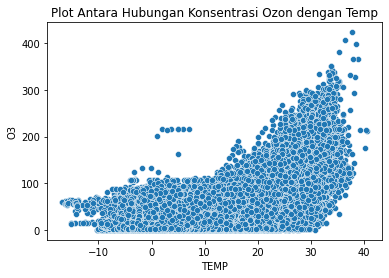

In [15]:
sns.scatterplot(x=df['TEMP'],y=df['O3'])
plt.title("Plot Antara Hubungan Konsentrasi Ozon dengan Temp")
plt.show()

### Pertanyaan 2:

Membuat plot antara hubungan PM2.5 dengan temp

c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


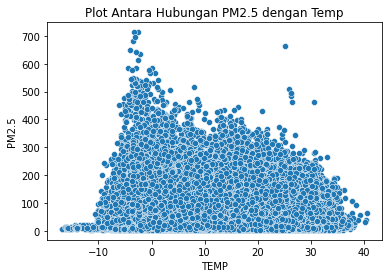

In [16]:
sns.scatterplot(x=df['TEMP'],y=df['PM2.5'])
plt.title("Plot Antara Hubungan PM2.5 dengan Temp")
plt.show()

Membuat plot antara hubungan PM10 dengan temp

c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


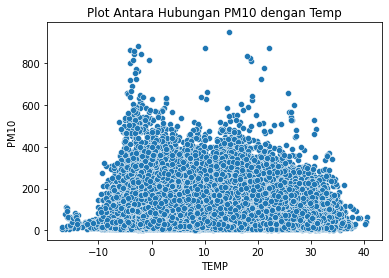

In [17]:
sns.scatterplot(x=df['TEMP'],y=df['PM10'])
plt.title("Plot Antara Hubungan PM10 dengan Temp")
plt.show()

# **Pertanyaan 3**

Membuat plot antara hubungan PM2.5 dengan cuaca dalam tahun

C:\Users\FREDERICO\AppData\Local\Temp\ipykernel_11384\707440764.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_df, x='season', y='Value', hue='Measurement', ci=None)
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in

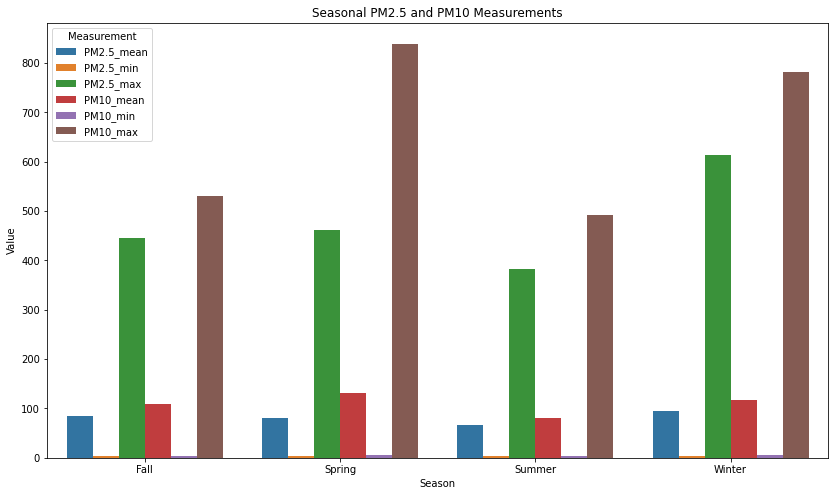

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data


# Define the seasons mapping
seasons = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Add a season column to the DataFrame
df['season'] = df['month'].map(seasons)

# Perform the aggregation
agg_df = df.groupby(["year", "season"])[["PM2.5", "PM10"]].agg({
    "PM2.5": ["mean", "min", "max"],
    "PM10": ["mean", "min", "max"]
})

# Reset index to convert multi-index DataFrame to a regular DataFrame
agg_df = agg_df.reset_index()

# Rename columns for easier access
agg_df.columns = ['year', 'season', 'PM2.5_mean', 'PM2.5_min', 'PM2.5_max', 'PM10_mean', 'PM10_min', 'PM10_max']

# Melt the DataFrame to long format
melted_df = agg_df.melt(id_vars=['year', 'season'], value_vars=['PM2.5_mean', 'PM2.5_min', 'PM2.5_max', 'PM10_mean', 'PM10_min', 'PM10_max'],
                        var_name='Measurement', value_name='Value')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='season', y='Value', hue='Measurement', ci=None)
plt.title('Seasonal PM2.5 and PM10 Measurements')
plt.xlabel('Season')
plt.ylabel('Value')
plt.legend(title='Measurement')
plt.show()

Membuat plot antara hubungan PM2.5 dengan cuaca

C:\Users\FREDERICO\AppData\Local\Temp\ipykernel_11384\3823191143.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=melted_df, x='season', y='Value', hue='Measurement', ci=None)
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FREDERICO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will b

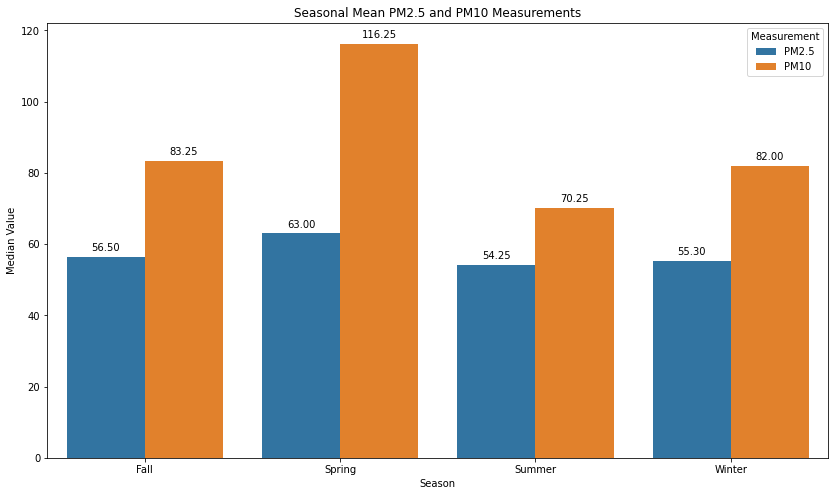

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



seasons = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}


df['season'] = df['month'].map(seasons)


agg_df = df.groupby(["year", "season"])[["PM2.5", "PM10"]].median().reset_index()


melted_df = agg_df.melt(id_vars=['year', 'season'], value_vars=['PM2.5', 'PM10'],
                        var_name='Measurement', value_name='Value')


plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=melted_df, x='season', y='Value', hue='Measurement', ci=None)
plt.title('Seasonal Mean PM2.5 and PM10 Measurements')
plt.xlabel('Season')
plt.ylabel('Median Value')
plt.legend(title='Measurement')


for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

plt.show()

**Insight:**
- Untuk pertanyaan pertama terbukti bahwa semakin suhu meningkat maka konsentrasi ozon menjadi meningkat
- Untuk pertanyaan kedua diketahui bahwa polutan menjadi banyak ketika suhu rendah namun rendah sekali justru polutan menjadi semakin sedikit
- Untuk pertanyaan ketiga diketahui bahwa musim berpengaruh terhadap banyaknya polutan puncaknya di season spring

In [19]:
df.to_csv("filtered_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1
Bisa di dapatkan bahwa setiap kali temperature naik maka ozon juga naik, yang merupakan faktor utama dari hal ini adalah suhu tinggu mempercepat reaksi kimia yang menghasilkan ozon.
- Conclusion pertanyaan 2
Dari grafik di atas bisa disimpulkan bahwa tiap kali temp menurun maka polutan akan menjadi naik meskipun ada limitasi di temp sekian, yang disebabkan oleh banyaknya aktifitas pembakaran pada cuaca dingin atau udara dingin lebih stabil dan tidak banyak bergerak.
- Conclusion pertanyaan 3
Dari grafik diatas bisa disimpulkan bahwa polutan terbanyak terjadi di season spring, winter, fall, summer.